In [ ]:
# переменный по умлочаю в функции

In [ ]:
def f1(x, z=['cc']):
    print(z)
    z.append(x)
    print(z)


In [ ]:
f1('1')

In [ ]:
f1('2')

In [ ]:
# join 

In [ ]:
ls -al  /tmp/sql_dump/db.sqlite3

In [1]:
import sqlite3
connection = sqlite3.connect('/tmp/sql_dump/db.sqlite3')
cursor = connection.cursor()


In [ ]:
cursor.execute("""
select title, price
from products_history 
where id in (1991, 1992, 1993 )
""")

print(cursor.fetchall())

In [ ]:
cursor.execute("""
select *
from person_person 
""")

print(cursor.fetchall())

In [ ]:
cursor.execute("""
insert into person_person(name, surname) values('Artem', 'Tsurkov')
""")

print(cursor.fetchall())

In [ ]:
cursor.execute("""
select id, person_id, offer_id, datetime, final_sum, quantity, price, title
from person_check
""")

print(cursor.fetchall())

In [ ]:
cursor.execute("""
insert into person_check(person_id, offer_id, datetime, final_sum, quantity, price, title) values(1, 1991, "2022-12-18 19:56:00", 13753518.00, 1, 13753518.00, "Мичуринский 2 27 39.8")
""")

print(cursor.fetchall())

In [ ]:
cursor.execute("""
insert into person_check(person_id, offer_id, datetime, final_sum, quantity, price, title) values(1, 1992, "2022-12-18 19:57:00", 16950381.00, 1, 16950381.00, "Южнопортовая 1 31 68.7 ул. Южнопортовая")
""")

print(cursor.fetchall())

In [ ]:
cursor.execute("""
select id, person_id, offer_id, datetime, final_sum, quantity, price, title
from person_check
""")
cursor.fetchall()

In [ ]:
cursor.execute(""" 
update person_check set  offer_id = 1991  where id = 1
""")

print(cursor.fetchall())

In [ ]:
cursor.execute("""
select id, person_id, offer_id, datetime, final_sum, quantity, price, title
from person_check
""")
cursor.fetchall()

In [ ]:
cursor.execute("""
select 
""")

print(cursor.fetchall())

In [ ]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select c.id, c.datetime, c.person_id, c.final_sum, person.id, person.name, person.surname
from person_check as c join person_person as person
""")

cursor.fetchall()

In [ ]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select c.id, c.datetime, c.person_id, c.final_sum, p1.id, p1.name, p1.surname
from person_check as c join person_person as p1 
    on c.person_id = p1.id 
""")

cursor.fetchall()

In [ ]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select c.id, c.datetime, c.person_id, c.final_sum, p1.id, p1.name, p1.surname
from person_person as p1  join  person_check as c 
    on c.person_id = p1.id 
""")

cursor.fetchall()

In [ ]:
#join inner, outher, left, right

In [ ]:
# left join

In [ ]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select c.id, c.datetime, c.person_id, c.final_sum, p1.id, p1.name, p1.surname
from person_check as c left join person_person as p1 
    on c.person_id = p1.id 
""")

cursor.fetchall()

In [ ]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select p1.id, p1.name, p1.surname, c.id, c.datetime, c.person_id, c.final_sum
from person_person as p1 left join person_check as c 
    on c.person_id = p1.id 
""")

cursor.fetchall()

In [ ]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select p1.id, p1.name, p1.surname, c.id, c.datetime, c.person_id, c.final_sum
from person_person as p1 inner join person_check as c 
    on c.person_id = p1.id 
""")

cursor.fetchall()

In [ ]:
#  join 3 таблиц

In [ ]:
# все чеки с фио персон котрые их купили плюс превоналваыы офер
cursor.execute("""
select p1.id, p1.name, p1.surname, c.id, c.title, c.datetime, c.person_id, c.final_sum, h.id, h.price_sale, h.title
from person_person as p1 inner join person_check as c 
    on c.person_id = p1.id  join products_history as h on c.offer_id = h.id
""") 

cursor.fetchall()

In [ ]:
# все чеки с фио персон котрые их купили плюс превоналваыы офер
cursor.execute("""
select 
    p1.id, 
    p1.name, 
    p1.surname, 
    c.id, 
    c.title, 
    c.datetime, 
    c.person_id, 
    c.final_sum, 
    h.id, 
    h.price_sale, 
    h.title
from person_person as p1 
    inner join person_check as c 
        on c.person_id = p1.id  
    join products_history as h 
        on c.offer_id = h.id
""") 

cursor.fetchall()

In [ ]:
cursor.execute(""" 
update person_check set  price = 15000000  where id = 3
""")

print(cursor.fetchall())





In [ ]:
# все чеки с фио персон котрые их купили
cursor.execute("""
select person_check.id, person_check.datetime,  person_check.person_id,  person_check.price
from person_check 
""")

cursor.fetchall()

In [ ]:
#окнооные функции

In [ ]:
# group

cursor.execute("""
select person_id, count(1), max(price)
from person_check
group by person_id
""")

cursor.fetchall()

In [ ]:
13753518

In [ ]:
#пронмуеруме записаи для каждо полльзователя
cursor.execute("""
select person_id, 
    id,
    datetime,  
    price,
    ROW_NUMBER() OVER(PARTITION BY person_id ORDER BY datetime desc) AS row_number,
    LEAD(price,1,0) OVER (PARTITION BY person_id ORDER BY  datetime desc ) AS prev_price,
    LAG(price,1,0) OVER (PARTITION BY person_id ORDER BY  datetime desc ) AS p_price
from person_check

""")

cursor.fetchall()

In [ ]:
#пронмуеруме записаи для каждо полльзователя
cursor.execute("""
select person_id, 
    id,
    datetime,  
    price,
    ROW_NUMBER() OVER(PARTITION BY person_id ORDER BY datetime desc) AS row_number,
    LEAD(price,1,0) OVER (PARTITION BY person_id ORDER BY  datetime desc ) AS prev_price,
    LAG(price,1,0) OVER (PARTITION BY person_id ORDER BY  datetime desc ) AS p_price
from person_check

order by price desc
""")

cursor.fetchall()

In [ ]:
cursor.execute("""
insert into person_check(person_id, offer_id, datetime, final_sum, quantity, price, title) 
values(3, 1993, "2022-12-18 19:58:00", 100, 1, 100, "xyz")
""")

print(cursor.fetchall())


In [ ]:
cursor.execute("""
            WITH sales_numbered AS (
                SELECT 
                    id, 
                    title,
                    price_sale,  
                    LEAD(price_sale,1,0) OVER (PARTITION BY title, url ORDER BY  title, id desc ) AS prev_price_sale,  
                    price_sale - LEAD(price_sale,1,0) OVER (PARTITION BY title, url  ORDER BY title, id desc ) AS diff,
                    ROW_NUMBER() OVER(PARTITION BY title, url ORDER BY id desc) AS row_number
                FROM products_history
                where datetime_create >= "{d.date()}"
                ORDER BY id desc
                LIMIT 1000000
            )
            SELECT 
                id, 
                title,
                price_sale,  
                prev_price_sale,
                diff,
                ROUND(diff / price_sale * 100) as per,
                row_number
            FROM sales_numbered
            WHERE row_number = 1 and diff !=0 and diff != price_sale and (diff + prev_price_sale) != 0
            Order by per;

        """)

In [ ]:
cursor.execute("""
SELECT 
    id, 
    title,
    price_sale,  
    LEAD(price_sale,1,0) OVER (PARTITION BY title, url ORDER BY  title, id desc ) AS prev_price_sale,  
    price_sale - LEAD(price_sale,1,0) OVER (PARTITION BY title, url  ORDER BY title, id desc ) AS diff,
    ROW_NUMBER() OVER(PARTITION BY title, url ORDER BY id desc) AS row_number
FROM products_history
where datetime_create >= "2022-12-17"
ORDER BY id desc
LIMIT 10     
""")

cursor.fetchall()


In [ ]:
# графики

In [2]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())


import matplotlib.pyplot as plt

3.7.1
module://matplotlib_inline.backend_inline


3.7.1
module://matplotlib_inline.backend_inline


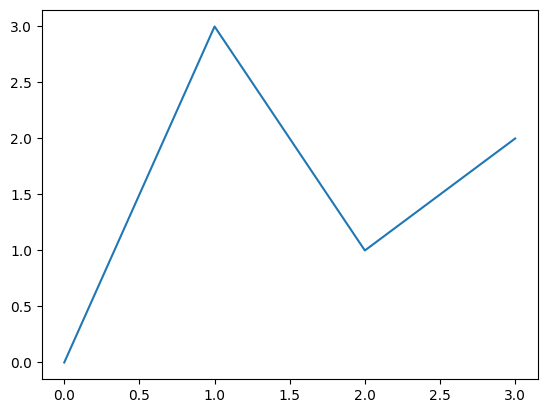

In [3]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

import matplotlib.pyplot as plt
plt.plot([0, 1, 2, 3], [0, 3, 1, 2])
plt.show()


In [ ]:
plt.plot([0, 1, 2, 3], [2, 1, 3, 0])
plt.show()

In [ ]:
import numpy as np
x = np.linspace(0, 4 * np.pi, 100)

print(x)

plt.figure()
plt.plot(x, np.sin(x))
plt.show()

In [ ]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x))
plt.plot([0, 1, 2, 3], [2, 1, 3, 0])
plt.show()

In [ ]:
x = np.linspace(0, 4 * np.pi, 100)

plt.figure()
plt.plot(x, np.sin(x), linewidth=2, color='b',  dashes=[8, 4], label=r'sin x')
plt.plot([0, 1, 2, 3], [2, 1, 3, 0], linewidth=2, color='r', dashes=[8, 4, 2, 4], label=r'x')
plt.legend(fontsize=20, loc=1)
plt.show()

In [ ]:
# теперь попробуем соединить с нашими данными из бд

In [ ]:
ls -la /tmp/sql_dump/db.sqlite3

In [ ]:
ls -la /home/jupyter-amtsu/project/price_alert/db.sqlite3

In [ ]:
mkdir /tmp/sql_dump

In [ ]:
ls -la /tmp

In [ ]:
!df -h

In [ ]:
!sudo rm -rf /tmp/sql_dump/db.sqlite3

In [ ]:
!sudo cp /home/jupyter-amtsu/project/price_alert/db.sqlite3 /tmp/sql_dump/db.sqlite3

In [ ]:
ls -la /tmp/sql_dump/db.sqlite3

In [ ]:
ls -la /home/jupyter-amtsu/project/price_alert/db.sqlite3

In [ ]:
!df -h

In [ ]:
ls -lah /tmp/sql_dump/db.sqlite3

In [ ]:
import sqlite3
connection = sqlite3.connect('/tmp/sql_dump/db.sqlite3')
cursor = connection.cursor()

In [4]:
cursor.execute("""select distinct(seller) from products_history""")
cursor.fetchall()

[('',),
 (None,),
 ('seller_example',),
 ('seller_example_sivanov',),
 ('Магазин Улей',),
 ('220 Вольт',),
 ('СпортМарафон',),
 ('ТК Турин',)]

In [5]:
cursor.execute("""
.tables
""")
cursor.fetchall()

OperationalError: near ".": syntax error

In [ ]:
cursor.execute("""
select  price_sale, date(datetime_create)
from products_history 
where price > 10000
    and title like "%куртка%"
order by  price asc
limit 1000000
""")

x = []
y = []
for i in cursor.fetchall():
    x.append(i[1])
    y.append(i[0])

In [ ]:

cursor.execute("""
select  distinct(title)
from products_history 
where title like "%Nutella%"
limit 1000000
""")

print(cursor.fetchall())

In [ ]:

cursor.execute("""
select  price_sale, date(datetime_create) as d, title
from products_history 
where title like "%utella%"
    and title like "%350%"
    and title  like "%околадная%"
order by  d asc, price_sale asc
limit 1000000
""")

#print(cursor.fetchall())
x = []
y = []
for i in cursor.fetchall():
    print(i)
    x.append(i[1])
    y.append(i[0])

In [ ]:
plt.figure()
#plt.plot([0, 1, 2, 3], [2, 1, 3, 0])
plt.plot(x, y)
plt.show()

In [ ]:

cursor.execute("""
select  distinct(title)
from products_history 
where title like "%raffaello%"
limit 1000000
""")

print(cursor.fetchall())

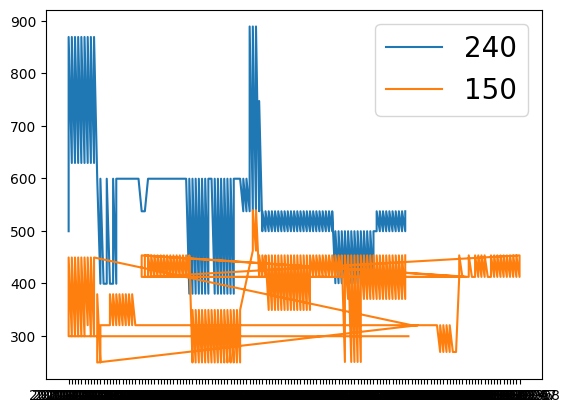

In [6]:

cursor.execute("""
select  price_sale, date(datetime_create) as d, title
from products_history 
where title like "%raffaello%"
    and title like "%240%"
order by  d asc, price_sale asc, title asc
limit 1000000
""")

#print(cursor.fetchall())
x = []
y = []
for i in cursor.fetchall():
    #print(i)
    x.append(i[1])
    y.append(i[0])
    
    

cursor.execute("""
select  price_sale, date(datetime_create) as d, title
from products_history 
where title like "%raffaello%"
    and title like "%150%"
order by  d asc, price_sale asc, title asc
limit 1000000
""")

#print(cursor.fetchall())
x2 = []
y2 = []
for i in cursor.fetchall():
    #print(i)
    x2.append(i[1])
    y2.append(i[0])
    
plt.figure()
#plt.plot([0, 1, 2, 3], [2, 1, 3, 0])
plt.plot(x, y, label=r'240')
plt.plot(x2, y2, label=r'150')
plt.legend(fontsize=20, loc=1)
plt.show()

In [7]:
ls -la 

total 64
drwxr-xr-x  3 jupyter-amtsu jupyter-amtsu  4096 May  1 10:38 ./
drwxr-xr-x 36 jupyter-amtsu jupyter-amtsu  4096 Mar 25 12:13 ../
drwxr-xr-x  2 jupyter-amtsu jupyter-amtsu  4096 Dec 18 18:42 .ipynb_checkpoints/
-rw-r--r--  1 jupyter-amtsu jupyter-amtsu 52185 May  1 10:38 lesson_25.ipynb


In [ ]:
import sqlite3
#connection = sqlite3.connect('/home/jupyter-amtsu/project/price_alert/db.sqlite3')
connection = sqlite3.connect('/tmp/sql_dump/db.sqlite3')
cursor = connection.cursor()

In [8]:


cursor.execute("""
select 
datetime_create, count(1)

from products_history
where url like "%level.ru%"
    and datetime_create >  "2022-12-07 00:05" and  datetime_create <  "2022-12-08"
--group by date(datetime_create)
limit 100
""")

print(cursor.fetchall())

[('2022-12-07 00:12:12.726653', 1090)]


In [ ]:
# удалил лишние данные

cursor.execute("""
delete
from products_history 
where url like "%level.ru%"
    and datetime_create >  "2022-12-07 05:05" and  datetime_create <  "2022-12-08"
""")

print(cursor.fetchall())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


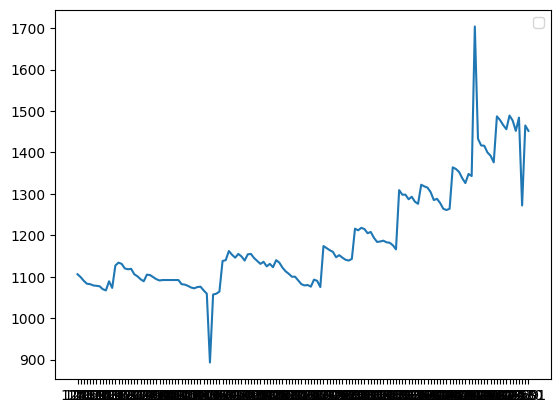

In [9]:
# график количества доступных предложений на рынке

cursor.execute("""
select 
strftime('%m%d', (datetime_create)), count(1)

from products_history 
where url like "%level.ru%"
    
group by date(datetime_create)
limit 1000
""")

x2 = []
y2 = []
for i in cursor.fetchall():
    #print(i)
    x2.append(i[0])
    y2.append(i[1])
    
plt.figure()
plt.plot(x2, y2)#, label=r'150')
plt.legend(fontsize=10, loc=1)
plt.show()

#print(cursor.fetchall())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


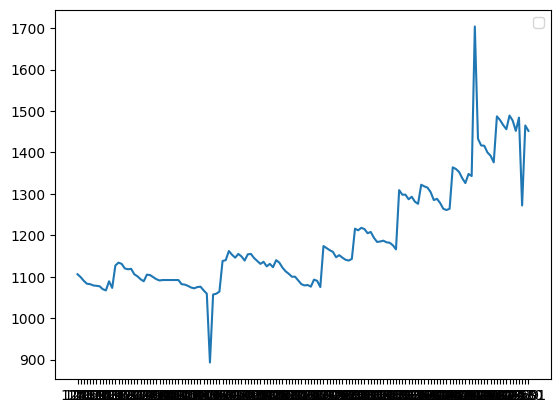

In [10]:
# график количества доступных предложений на рынке

cursor.execute("""
select 
strftime('%m%d', (datetime_create)), count(1)

from products_history 
where url like "%level.ru%"
    
group by date(datetime_create)
limit 1000
""")

x2 = []
y2 = []
for i in cursor.fetchall():
    #print(i)
    x2.append(i[0])
    y2.append(i[1])
    
plt.figure()
plt.plot(x2, y2)#, label=r'150')
plt.legend(fontsize=10, loc=1)
plt.show()

#print(cursor.fetchall())

# Пробую добавить экспоциию

In [1]:
import sqlite3
connection = sqlite3.connect('/tmp/sql_dump/db.sqlite3')
cursor = connection.cursor()


OperationalError: unable to open database file

In [ ]:
cursor.execute("""
SELECT 
    id, 
    title,
    apartment_area,
    price_sale, 
    
    LEAD(price_sale,1,0) OVER (PARTITION BY title, url ORDER BY  title, id desc ) AS prev_price_sale,  
    price_sale - LEAD(price_sale,1,0) OVER (PARTITION BY title, url  ORDER BY title, id desc ) AS diff,
    ROW_NUMBER() OVER(PARTITION BY title, url ORDER BY id desc) AS row_number
FROM products_history
where datetime_create >= "2022-12-17"
    and url like "%level.ru%"
    and title like "%Нагатинская%"
    and apartment_floor = 13
    and apartment_room = 1
    and apartment_area = '30.5'
ORDER BY id desc
LIMIT 300     
""")

cursor.fetchall()

In [ ]:
cursor.execute("""
WITH sales_numbered AS (
SELECT 
    id, 
    title,
    price_sale,
    --LEAD(price_sale,1,0) OVER (PARTITION BY title, url, apartment_floor, apartment_room, apartment_area ORDER BY  title, id desc ) AS prev_price_sale,  
    apartment_area,
    "2022-12-17" as date_start_import,
    MIN(datetime_create) OVER (PARTITION BY title, url ) as datetime_create_min,
    MAX(datetime_create) OVER (PARTITION BY title, url ) as datetime_create_max,
    julianday(date(MAX(datetime_create) OVER (PARTITION BY title, url ))) - julianday(date(MIN(datetime_create) OVER (PARTITION BY title, url ))) as days_of_exposure,
    
    MIN(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 6 FOLLOWING) as d7_min,
    AVG(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 6 FOLLOWING) as d7_avg,
    MAX(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 6 FOLLOWING) as d7_max,
    
    MIN(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 29 FOLLOWING) as d30_min,
    AVG(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 29 FOLLOWING) as d30_avg,
    MAX(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 29 FOLLOWING) as d30_max,

    MIN(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 89 FOLLOWING) as d90_min,
    AVG(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 89 FOLLOWING) as d90_avg,
    MAX(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 89 FOLLOWING) as d90_max,

    MIN(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 364 FOLLOWING) as d365_min,
    AVG(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 364 FOLLOWING) as d365_avg,
    MAX(price_sale) OVER (PARTITION BY title, url ORDER BY title, id desc ROWS BETWEEN CURRENT ROW AND 364 FOLLOWING) as d365_max,
    
    MIN(price_sale) OVER (PARTITION BY title, url ) as all_min,
    AVG(price_sale) OVER (PARTITION BY title, url ) as all_avg,
    MAX(price_sale) OVER (PARTITION BY title, url ) as all_max,

    price_sale - LEAD(price_sale,1,0) OVER (PARTITION BY title, url  ORDER BY title, id desc ) AS diff,
    ROW_NUMBER() OVER(PARTITION BY title, url ORDER BY id desc) AS row_number
FROM products_history
where datetime_create >= "2022-01-17"
    and url like "%level.ru%"
    and title like "%Нагатинская%"
    --and apartment_floor = 13
    --and apartment_room = 1
    --and apartment_area = '30.5'
ORDER BY id desc
LIMIT 300     
)
SELECT 

    id, 
    title,
    price_sale,
    apartment_area,
    date_start_import,
    datetime_create_min,
    datetime_create_max,
    --date(datetime_create_max),
    --datetime(datetime_create_max),
    --julianday(date(datetime_create_max)) - julianday(date(datetime_create_min)) as days_of_exposure,
    days_of_exposure,
    CASE
        WHEN days_of_exposure < 7 
            THEN '1'
    END AS d7_sale,
    CASE
        WHEN days_of_exposure >= 7 and days_of_exposure < 40 
            THEN '1'
    END AS d30_sale,
    CASE
        WHEN days_of_exposure >= 40 and days_of_exposure < 110 
            THEN '1'
    END AS d90_sale,
    CASE
        WHEN days_of_exposure >= 110 and days_of_exposure < 400 
            THEN '1'
    END AS d365_sale,

    d7_min,
    d7_avg,
    d7_max,

    d30_min,
    d30_avg,
    d30_max,

    d90_min,
    d90_avg,
    d90_max,

    d365_min,
    d365_avg,
    d365_max,

    all_min,
    all_avg,
    all_max,

    row_number
FROM sales_numbered
WHERE row_number = 1
Order by days_of_exposure;

""")

cursor.fetchall()

In [ ]:
!df -h

In [ ]:
#connection.commit()

In [ ]:
#connection.close()

In [ ]:
#нужен графки сколько новых обетов появилос + сколько страрых обектов ушло

In [ ]:
#почиать ли обекты которые имебт большге чем одно окно 

In [ ]:
import sqlite3
#connection = sqlite3.connect('/home/jupyter-amtsu/project/price_alert/db.sqlite3')
connection = sqlite3.connect('/tmp/sql_dump/db.sqlite3')
cursor = connection.cursor()

In [ ]:
import matplotlib
print(matplotlib.__version__)
print(matplotlib.get_backend())

import matplotlib.pyplot as plt

In [ ]:
# посмотреть как менялось цена на разные отпарвиатиели

cursor.execute("""
select 
title, url, price_sale, strftime('%m %d', (datetime_create))

from products_history 
where (title like "%отпари%"
    or category like "%отпари%"
    or description like "%отпари%"
    )
    and price_sale != 0
    
order by datetime_create asc
limit 10000
""")

plt.figure()

x = {}
y = {}
z = {}
for i in cursor.fetchall():
    
    if not x.get(i[0]):
        x[i[0]] = []
    if not y.get(i[0]):
        y[i[0]] = []
    if not z.get(i[0]):
        z[i[0]] = set()        

    x[i[0]].append(i[2])
    y[i[0]].append(i[3])
    z[i[0]].add(i[0][:30])
      
#print(x)        
for k in x:
    
    x2 = x[k]
    y2 = y[k]    
    #print(k)
    #print(x2)
    #print(y2)
    plt.plot(y2, x2, label=z[k]) #, label=r'150')
    
plt.legend(fontsize=5, loc=2)
plt.show()


#print(cursor.fetchall())

In [ ]:
# посмотреть как менялось цена на разные отпарвиатиели

cursor.execute("""
select 
title, url, price_sale, strftime('%m %d', (datetime_create))

from products_history 
where (title like "%utell%"
    or category like "%utell%"
    or description like "%utell%"
    )
    and price_sale != 0
    
order by datetime_create asc
limit 10000
""")

plt.figure()

x = {}
y = {}
z = {}
for i in cursor.fetchall():
    
    if not x.get(i[0]):
        x[i[0]] = []
    if not y.get(i[0]):
        y[i[0]] = []
    if not z.get(i[0]):
        z[i[0]] = set()        

    x[i[0]].append(i[2])
    y[i[0]].append(i[3])
    z[i[0]].add(i[0][:30])
      
#print(x)        
for k in x:
    
    x2 = x[k]
    y2 = y[k]    
    #print(k)
    #print(x2)
    #print(y2)
    plt.plot(y2, x2, label=z[k]) #, label=r'150')
    
plt.legend(fontsize=5, loc=2)
plt.show()


#print(cursor.fetchall())

In [ ]:
# посмотреть как менялось цена на разные отпарвиатиели

cursor.execute("""
select 
title, url, price_sale, strftime('%m %d', (datetime_create))

from products_history 
where (title like "%snickers%"
    or category like "%snickers%"
    or description like "%snickers%"
    )
    and price_sale != 0
    
order by datetime_create asc
limit 10000
""")

plt.figure()

x = {}
y = {}
z = {}
for i in cursor.fetchall():
    
    if not x.get(i[0]):
        x[i[0]] = []
    if not y.get(i[0]):
        y[i[0]] = []
    if not z.get(i[0]):
        z[i[0]] = set()        

    x[i[0]].append(i[2])
    y[i[0]].append(i[3])
    z[i[0]].add(i[0][:30])
      
#print(x)        
for k in x:
    
    x2 = x[k]
    y2 = y[k]    
    #print(k)
    #print(x2)
    #print(y2)
    plt.plot(y2, x2, label=z[k]) #, label=r'150')
    
plt.legend(fontsize=5, loc=2)
plt.show()


#print(cursor.fetchall())

In [ ]:
# посмотреть как менялось цена на разные отпарвиатиели

cursor.execute("""
select 
title, url, price_sale, strftime('%m %d', (datetime_create))

from products_history 
where (title like "%Шпикачки АШАН Красная%"
    or category like "%Шпикачки АШАН Красная%"
    or description like "%Шпикачки АШАН Красная%"
    )
    and price_sale != 0
    
order by datetime_create asc
limit 10000
""")

plt.figure()

x = {}
y = {}
z = {}
for i in cursor.fetchall():
    
    if not x.get(i[0]):
        x[i[0]] = []
    if not y.get(i[0]):
        y[i[0]] = []
    if not z.get(i[0]):
        z[i[0]] = set()        

    x[i[0]].append(i[2])
    y[i[0]].append(i[3])
    z[i[0]].add(i[0][:30])
      
    #print(i)        
for k in x:
    
    x2 = x[k]
    y2 = y[k]    
    #print(k)
    #print(x2)
    #print(y2)
    plt.plot(y2, x2, label=z[k]) #, label=r'150')
    
plt.legend(fontsize=8, loc=2)
plt.show()


#print(cursor.fetchall())

In [ ]:
#

In [ ]:
# посмотреть как менялось цена на разные отпарвиатиели

cursor.execute("""
select 
title, url, price_sale, strftime('%m %d', (datetime_create))

from products_history 
where (title like "%Кефир АШАН%"
    or category like "%Кефир АШАН%"
    or description like "%Кефир АШАН%"
    )
    and price_sale != 0
    
order by datetime_create asc
limit 10000
""")

plt.figure()

x = {}
y = {}
z = {}
for i in cursor.fetchall():
    
    if not x.get(i[0]):
        x[i[0]] = []
    if not y.get(i[0]):
        y[i[0]] = []
    if not z.get(i[0]):
        z[i[0]] = set()        

    x[i[0]].append(i[2])
    y[i[0]].append(i[3])
    z[i[0]].add(i[0][:40])
      
    #print(i)        
for k in x:
    
    x2 = x[k]
    y2 = y[k]    
    #print(k)
    #print(x2)
    #print(y2)
    plt.plot(y2, x2, label=z[k]) #, label=r'150')
    
plt.legend(fontsize=8, loc=2)
plt.show()


#print(cursor.fetchall())

In [ ]:
# посмотреть как менялось цена на разные отпарвиатиели

cursor.execute("""
select 
title, url, price_sale, strftime('%m %d', (datetime_create))

from products_history 
where (title like "%Маракуйя, 2 шт%"
    or category like "%Маракуйя, 2 шт%"
    or description like "%Маракуйя, 2 шт%"
    )
    and price_sale != 0
    
order by datetime_create asc
limit 10000
""")

plt.figure()

x = {}
y = {}
z = {}
for i in cursor.fetchall():
    
    if not x.get(i[0]):
        x[i[0]] = []
    if not y.get(i[0]):
        y[i[0]] = []
    if not z.get(i[0]):
        z[i[0]] = set()        

    x[i[0]].append(i[2])
    y[i[0]].append(i[3])
    z[i[0]].add(i[0][:40])
      
    #print(i)        
for k in x:
    
    x2 = x[k]
    y2 = y[k]    
    #print(k)
    #print(x2)
    #print(y2)
    plt.plot(y2, x2, label=z[k]) #, label=r'150')
    
plt.legend(fontsize=8, loc=2)
plt.show()


#print(cursor.fetchall())

In [ ]:
cursor.execute("""
select 
title, url, price_sale, strftime('%m %d', (datetime_create))

from products_history 
where (title like "%маракуйя 2%"
    or category like "%маракуйя 2%"
    or description like "%маракуйя 2%"
    )
    and price_sale != 0
    
order by datetime_create asc
limit 100000
""")

cursor.fetchall()

In [ ]:
cursor.execute("""
select 
title, url, price_sale, strftime('%m %d', (datetime_create))

from products_history 
where (title like "%МАРАКУЙЯ"
    or category like "%МАРАКУЙЯ%"
    or description like "%МАРАКУЙЯ%"
    )
    and price_sale != 0
    
order by datetime_create asc
limit 100000
""")

cursor.fetchall()

In [ ]:
cursor.execute("""
select 
title, url, price_sale, strftime('%m %d', (datetime_create))

from products_history 
where (title like "%Маракуйя, 2 шт%"
    or category like "%Маракуйя, 2 шт%"
    or description like "%Маракуйя, 2 шт%"
    )
    and price_sale != 0
    
order by datetime_create asc
limit 100000
""")

cursor.fetchall()

In [ ]:
# посмотреть как менялось цена на разные отпарвиатиели

cursor.execute("""
select 
title, url, price_sale, strftime('%m %d', (datetime_create))

from products_history 
where (title like "%Nutella%"
    or category like "%Nutella%"
    or description like "%Nutella%"
    )
    and price_sale != 0
    
order by datetime_create asc
limit 10000
""")

plt.figure()

x = {}
y = {}
z = {}
for i in cursor.fetchall():
    
    if not x.get(i[0]):
        x[i[0]] = []
    if not y.get(i[0]):
        y[i[0]] = []
    if not z.get(i[0]):
        z[i[0]] = set()        

    x[i[0]].append(i[2])
    y[i[0]].append(i[3])
    z[i[0]].add(i[0][:40])
      
    #print(i)        
for k in x:
    
    x2 = x[k]
    y2 = y[k]    
    #print(k)
    #print(x2)
    #print(y2)
    plt.plot(y2, x2, label=z[k]) #, label=r'150')
    
plt.legend(fontsize=8, loc=2)
plt.show()


#print(cursor.fetchall())

In [ ]:
cursor.execute("""
select 
title, url, price_sale, strftime('%m %d', (datetime_create)), *

from products_history 
where url = 'https://www.auchan.ru/product/marakuyya-2sht-1'
    
order by datetime_create asc
limit 100000
""")

cursor.fetchall()